
www.kaggle.com
Usaremos dataset: https://www.kaggle.com/datasets/camnugent/california-housing-prices

Precio de las casas en el estado de California


1. longitude: medida de qué tan al oeste está una casa; un valor más alto es más al oeste

2. latitude: medida de qué tan al norte está una casa; un valor más alto es más al norte

3. housingMedianAge: Medad media de una casa dentro de una cuadra; un número más bajo es un edificio más nuevo

4. totalRooms: número total de habitaciones dentro de una cuadra

5. totalBedrooms: número total de habitaciones para dormir dentro de una cuadra

6. population: número total de personas que residen dentro de una cuadra

7. households: Total de casas en la cuadra.

8. medianIncome: ingreso medio para hogares dentro de una cuadra de casas (medido en decenas de miles de dólares estadounidenses, es decir: x10000)

9. medianHouseValue: valor medio de la casa para hogares dentro de una cuadra (medido en dólares estadounidenses)

10. oceanProximity: ubicación de la casa con respecto al océano

Son bloques de casas por latitud y longitud. Por eso se expresan los valores en promedios de cada bloque.




In [42]:
import pandas as pd

datos = pd.read_csv("housing.csv")

In [43]:
datos.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [44]:
#Estos datos mas adelante tendremos que pasarlos a numericos
datos["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [45]:
#Total_bedrooms mas adelante hay que ver que hacer con los valores faltantes
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [46]:
#Los ingresos promedios van de U$S5.000 a U$S150.000
datos.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

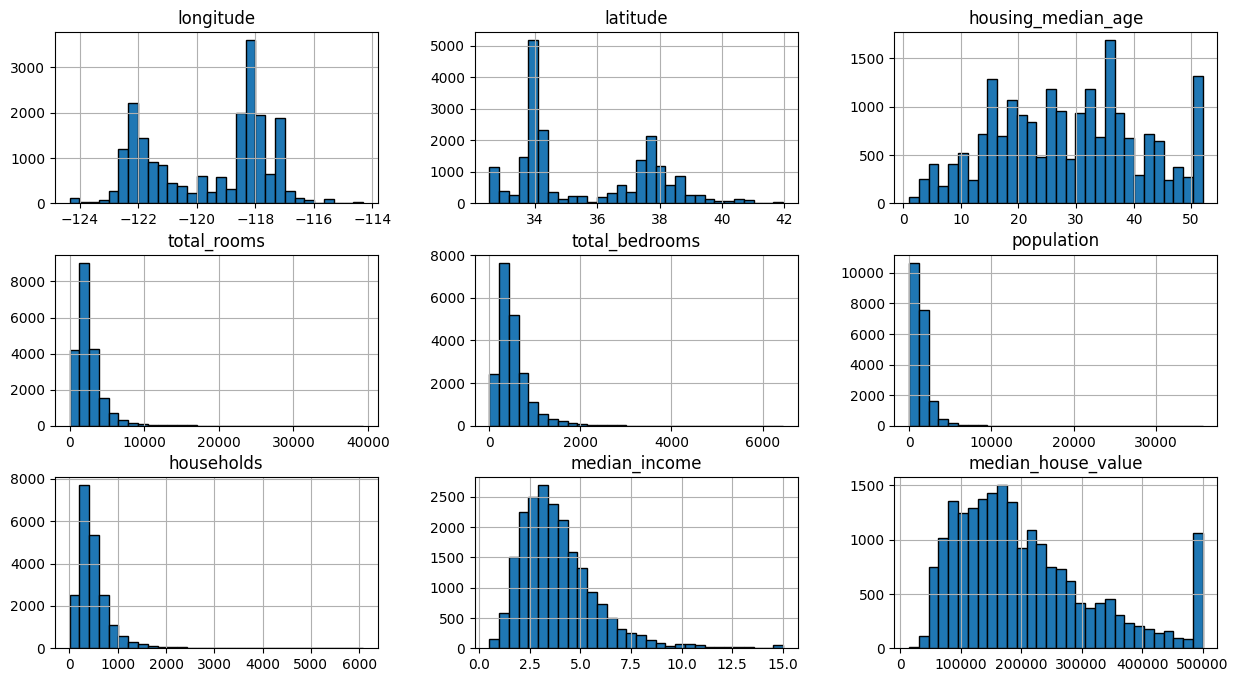

In [47]:
#Vamos a graficar enforma automatica algunos histogramas.
# ver que antiguedad posiblemente esta cargando todo lo es mayor a 52 en 52.
# Lo mismo pasa con el valor de las casas he ingresos. Hay que ver como manejar esto

datos.hist(figsize=(15,8), bins=30, edgecolor="black")

<Axes: xlabel='latitude', ylabel='longitude'>

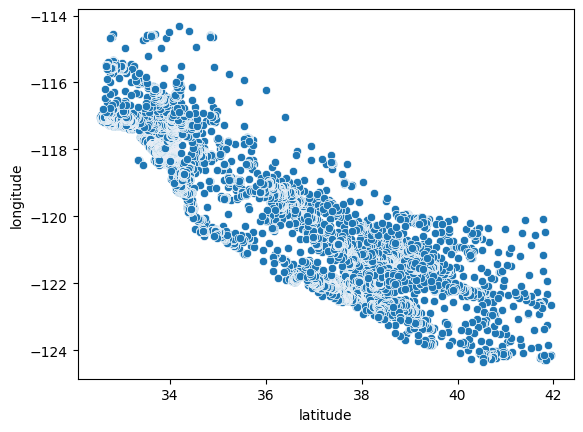

In [48]:
import seaborn as sb
sb.scatterplot(x="latitude", y="longitude", data=datos)

<Axes: xlabel='latitude', ylabel='longitude'>

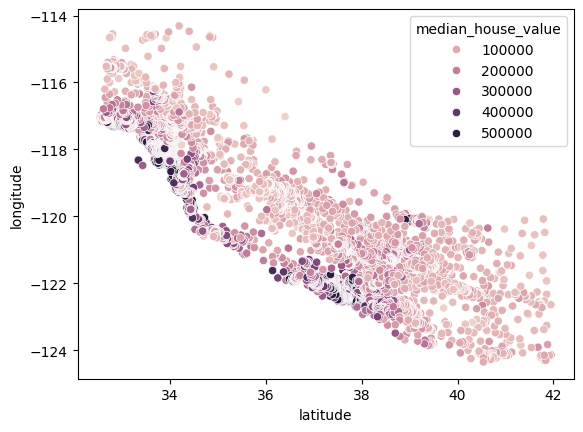

In [16]:
sb.scatterplot(x="latitude", y="longitude", data=datos, hue="median_house_value")

<Axes: xlabel='latitude', ylabel='longitude'>

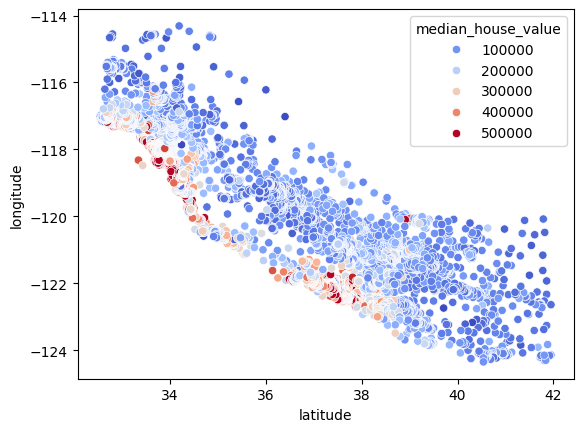

In [18]:
sb.scatterplot(x="latitude", y="longitude", data=datos, hue="median_house_value", palette="coolwarm")

TypeError: cannot convert the series to <class 'float'>

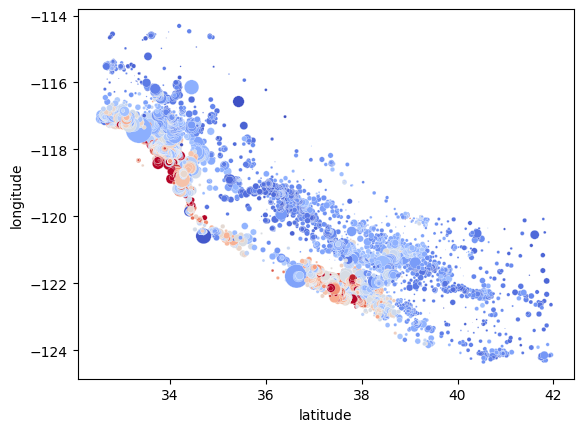

In [35]:
import seaborn as sb
sb.scatterplot(x="latitude", y="longitude", data=datos, hue="median_house_value", palette="coolwarm",
               s=datos["population"]/100)

<Axes: xlabel='latitude', ylabel='longitude'>

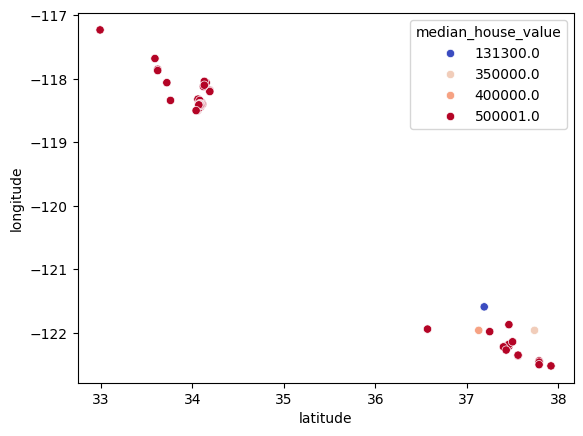

In [49]:
#vamos a filtrar los datos en el grafico para mostrar solo los que mas altos ingresos tienen.
sb.scatterplot(x="latitude", y="longitude", data=datos[(datos.median_income > 14)], hue="median_house_value", palette="coolwarm")

In [50]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [51]:
datos_na = datos.dropna()

In [52]:
datos_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [53]:
#Convertir la caracteística categórica a numérica
#Proximidad al oceano
datos_na["ocean_proximity"]


,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
...,...
20635,INLAND
20636,INLAND
20637,INLAND
20638,INLAND


In [54]:
datos_na["ocean_proximity"].value_counts()
# 1,2,3,4,5

,count
ocean_proximity,
<1H OCEAN,9034
INLAND,6496
NEAR OCEAN,2628
NEAR BAY,2270
ISLAND,5


In [55]:
#Dummies / One-Hot Encoding
# NEAR BAY   INLAND   NEAR OCEAN
#    1          0         0
#    0          0         1

dummies = pd.get_dummies(datos_na["ocean_proximity"], dtype=int)

In [56]:
datos_na = datos_na.join(dummies)

In [57]:
datos_na.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0


In [58]:
datos_na = datos_na.drop(["ocean_proximity"], axis=1)

In [59]:
datos_na.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [ ]:
#Analisis, nuevas caracteristicas

In [65]:

datos_na.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,0.320831,-0.055337,0.009501,-0.474714,0.046185
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,-0.446928,0.351084,-0.016662,0.358785,-0.161342
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,0.045553,-0.236968,0.017105,0.256149,0.020797
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,-0.003777,0.026477,-0.007603,-0.023647,-0.008674
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.018314,-0.006463,-0.004361,-0.019873,0.000679
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,0.073450,-0.019602,-0.010451,-0.061480,-0.023498
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,0.041883,-0.038265,-0.009119,-0.011280,0.002106
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,0.168715,-0.237536,-0.009281,0.056677,0.027351
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,0.257614,-0.484787,0.023525,0.160526,0.140378
<1H OCEAN,0.320831,-0.446928,0.045553,-0.003777,0.018314,0.073450,0.041883,0.168715,0.257614,1.000000,-0.607778,-0.013928,-0.314721,-0.342018


<Axes: >

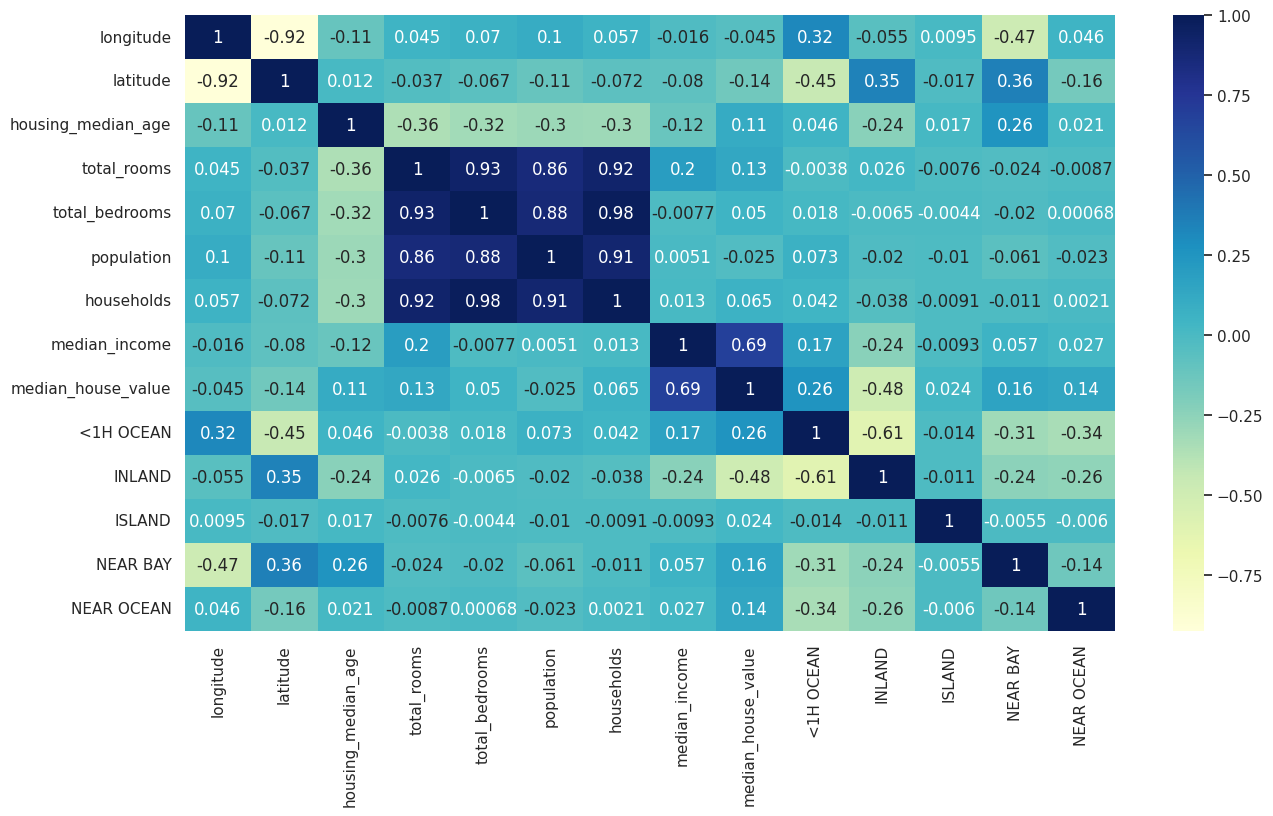

In [66]:
#Mostramos correlacion de valores y relaciones.

sb.set(rc={'figure.figsize': (15,8)})   #Especifico el tamaño de los cuadros. Se puede cambiar de acuerdo al monitor
sb.heatmap(datos_na.corr(), annot=True, cmap="YlGnBu")

In [67]:
#Listamos correlacion referida al valor medio de las casas.
#Con esto podemos determinar que hay una relacion fuerte entre el costo de la casa
#y el ingreso promedio.

datos.corr()["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688075
ocean_proximity_<1H OCEAN,0.256617
ocean_proximity_NEAR BAY,0.160284
ocean_proximity_NEAR OCEAN,0.141862
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
ocean_proximity_ISLAND,0.023416


<Axes: xlabel='median_house_value', ylabel='median_income'>

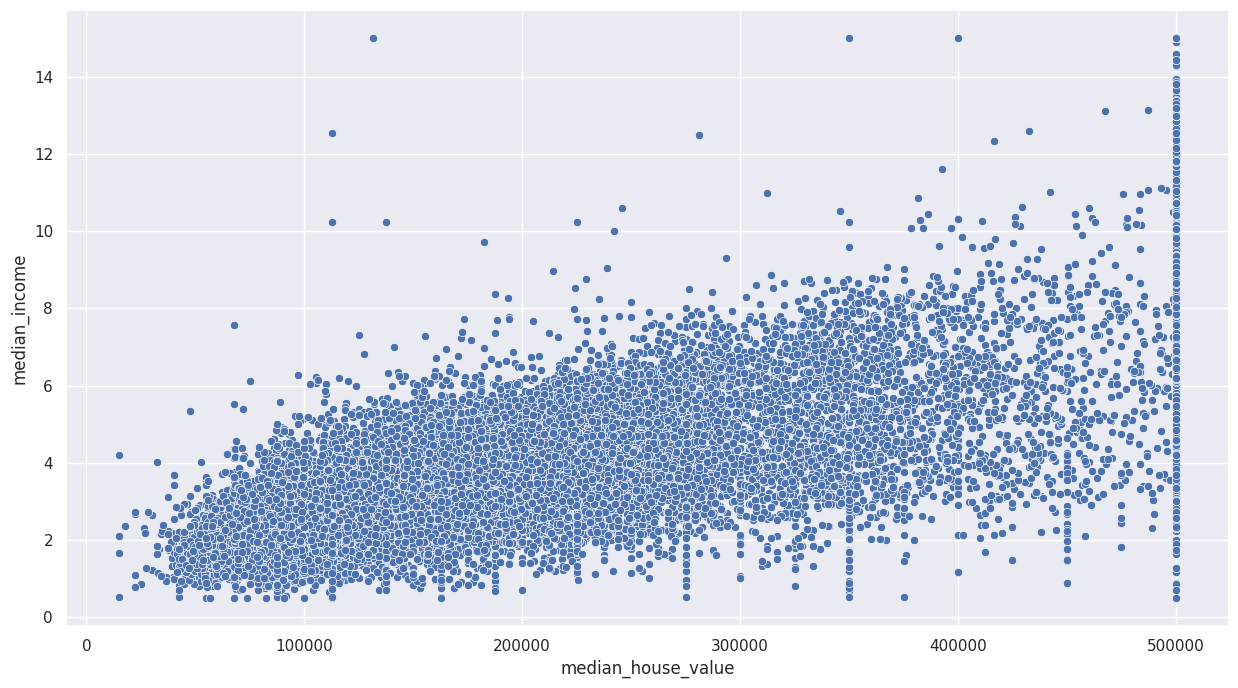

In [69]:
# Graficamos la relacion y podemos ver que hay una relacion bastante lineal.
# podriamos utilizar un modelo de regresion lineal.

sb.scatterplot(x=datos_na["median_house_value"], y=datos_na["median_income"])

In [70]:
#Creamos una nueva caracteristica que sea habitaciones para dormir dividido total de habitaciones
datos_na["bedroom_ratio"] = datos_na["total_bedrooms"] / datos_na["total_rooms"]

<Axes: >

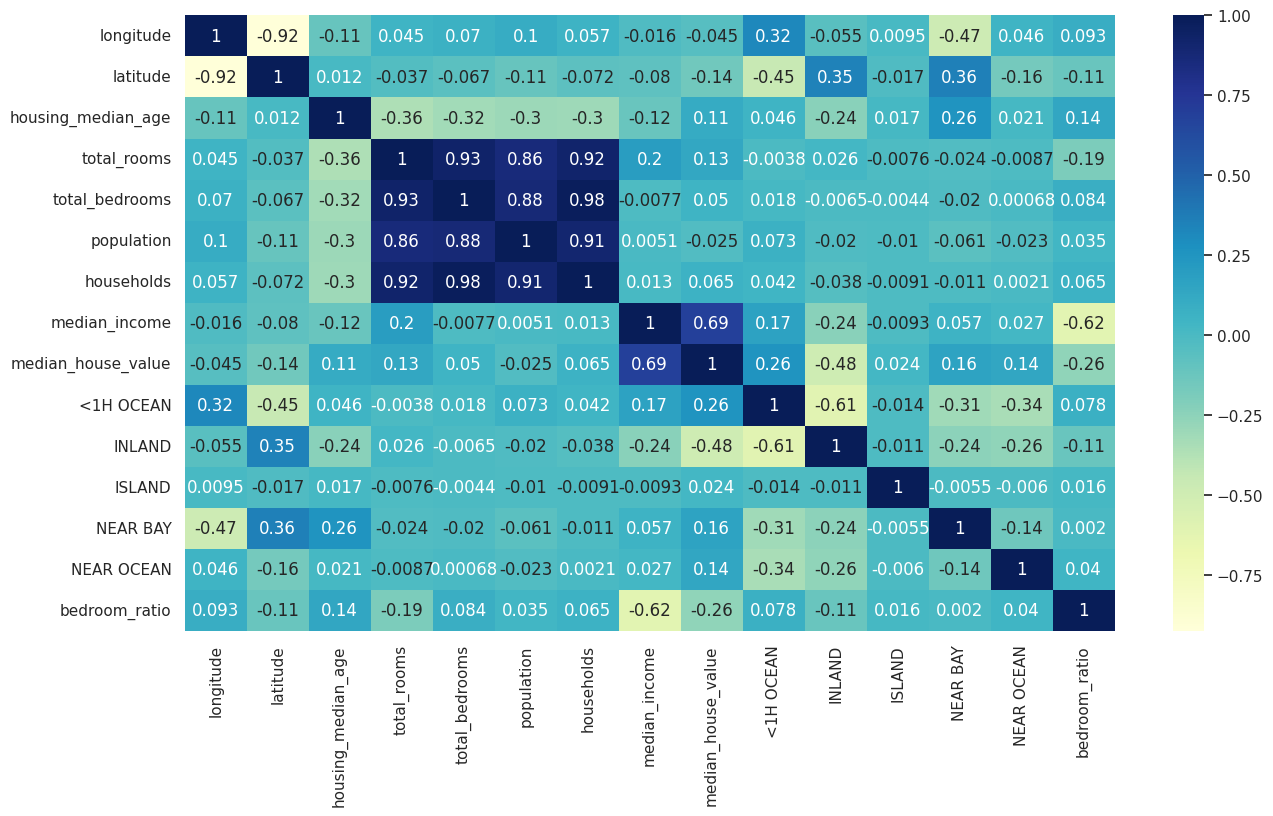

In [71]:
#Vemos que la nueva caracteristica tiene una relacion mas fuerte que las 2 por su parte.
#Es decir que la casa vale mas si tiene mas habitaciones que no sean para dormir

sb.set(rc={'figure.figsize': (15,8)})
sb.heatmap(datos_na.corr(), annot=True, cmap="YlGnBu")

In [72]:
#Separar las caracteristicas de la etiqueta
X = datos_na.drop(["median_house_value"], axis=1)
y = datos_na["median_house_value"]

In [73]:
#Separar los datos en 2 partes: Conjunto de entrenamiento y uno de pruebas
from sklearn.model_selection import train_test_split

X_ent, X_pru, y_ent, y_pru = train_test_split(X, y, test_size=.2)

In [74]:
from sklearn.linear_model import LinearRegression

modelo=LinearRegression()

In [75]:
modelo.fit(X_ent, y_ent)

LinearRegression()

In [76]:
predicciones = modelo.predict(X_pru)

In [77]:
comparativa = {"Prediccion": predicciones, "Valor Real": y_pru}
pd.DataFrame(comparativa)

,Prediccion,Valor Real
1424,171257.539129,156300.0
9463,177722.279792,165000.0
5537,407227.071624,500001.0
2681,40990.314314,69400.0
12010,134240.396893,198800.0
...,...,...
11184,217042.725408,213200.0
20148,212410.861986,191800.0
8616,302725.255576,337900.0
18544,174064.704399,262500.0


from matplotlib import pyplot as plt
_df_0['Prediccion'].plot(kind='hist', bins=20, title='Prediccion')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Valor Real'].plot(kind='hist', bins=20, title='Valor Real')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Prediccion', y='Valor Real', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Prediccion'].plot(kind='line', figsize=(8, 4), title='Prediccion')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Valor Real'].plot(kind='line', figsize=(8, 4), title='Valor Real')
plt.gca().spines[['top', 'right']].set_visible(False)

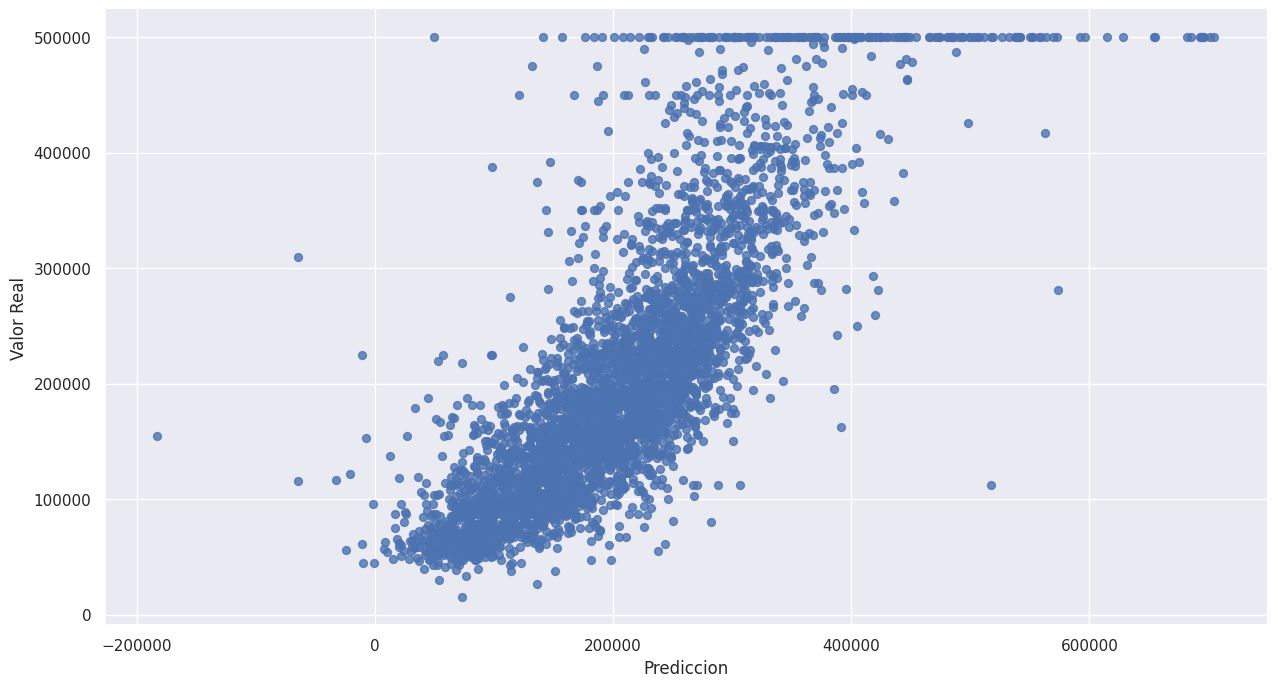

In [88]:
from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Prediccion', y='Valor Real', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [78]:
#Overfitting sobreajuste
print(modelo.score(X_ent, y_ent))
print(modelo.score(X_pru, y_pru))

0.6544962705106778
0.6417895439244653


In [79]:
#Error
#Tomo los datos, saca la diferencia y la eleva al cuadrado
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_pru, predicciones)

In [80]:
mse

4650552249.069945

In [81]:
#Obtengo la raiz cuadrada de MSE para visualizar el error en escala real

rmse = np.sqrt(mse)

In [82]:
rmse

68194.95765135385